In [303]:
# Importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

# Model utils
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE

# Model selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


## **Step 0. Loading and visualizing the data**

In [304]:
url = "https://raw.githubusercontent.com/MarthyGarcia/IFT6390_Project1/main/Data/cancer_reg.csv"

In [305]:
df = pd.read_csv(url)

In [306]:
df.shape

(3047, 33)

In [307]:
df.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [308]:
# Placing our label column at the end of the dataframe
df['label_deathrate'] = df['target_deathrate']
df.drop(['target_deathrate'], axis=1, inplace=True)
df.head()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,label_deathrate
0,1397.0,469,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,...,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,164.9
1,173.0,70,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,...,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,161.3
2,102.0,50,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,...,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,174.7
3,427.0,202,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,...,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,194.8
4,57.0,26,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,...,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,144.4


## **Step 1. Splitting the data into our train and test sets**

In [309]:
# Set seed
seed=1000

# Separating our attributes from our labels
def split_feat_label(data):
    x=data.iloc[:, :-1]
    y=data.iloc[:, -1]
    return x, y

x,y = split_feat_label(df)

# Splitting the data: test, train 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, shuffle= True, random_state=seed)

In [310]:
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

## **Step 2. Exploring and analysing our data**

In [311]:
train.shape

(2437, 33)

In [312]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2437 entries, 2152 to 1459
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              2437 non-null   float64
 1   avgdeathsperyear         2437 non-null   int64  
 2   incidencerate            2437 non-null   float64
 3   medincome                2437 non-null   int64  
 4   popest2015               2437 non-null   int64  
 5   povertypercent           2437 non-null   float64
 6   studypercap              2437 non-null   float64
 7   binnedinc                2437 non-null   object 
 8   medianage                2437 non-null   float64
 9   medianagemale            2437 non-null   float64
 10  medianagefemale          2437 non-null   float64
 11  geography                2437 non-null   object 
 12  percentmarried           2437 non-null   float64
 13  pctnohs18_24             2437 non-null   float64
 14  pcths18_24           


The dataset contains 33 columns and the variable we look to predict is named: label_deathrate. Most variables are numerical with the exception of two categorial features named geography and binnedinc.

In [313]:
# Do we have any missing values? 
train.isna().sum()/len(train)

avganncount                0.000000
avgdeathsperyear           0.000000
incidencerate              0.000000
medincome                  0.000000
popest2015                 0.000000
povertypercent             0.000000
studypercap                0.000000
binnedinc                  0.000000
medianage                  0.000000
medianagemale              0.000000
medianagefemale            0.000000
geography                  0.000000
percentmarried             0.000000
pctnohs18_24               0.000000
pcths18_24                 0.000000
pctsomecol18_24            0.745999
pctbachdeg18_24            0.000000
pcths25_over               0.000000
pctbachdeg25_over          0.000000
pctemployed16_over         0.054575
pctunemployed16_over       0.000000
pctprivatecoverage         0.000000
pctprivatecoveragealone    0.200246
pctempprivcoverage         0.000000
pctpubliccoverage          0.000000
pctpubliccoveragealone     0.000000
pctwhite                   0.000000
pctblack                   0

We can see that pctsomecole18_24 is missing almost 75.0% of its values, therefore it would be preferable to remove it. There is also pctprivatecoveragealone that is missing 20.0 % of its values and pctemployed16_over with 5.0% of NaN.

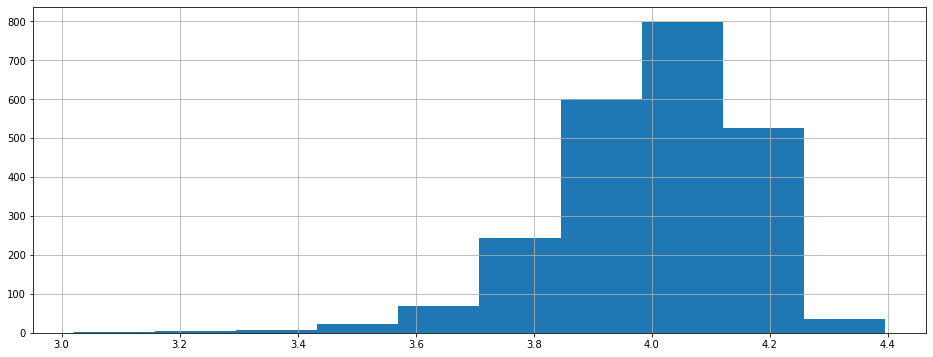

In [339]:
# We can set the missing values in "pctemployed16_over" and in "pctprivatecoveragealone" to some value (zero, the mean, the median, etc.).
# First let's look at their respective distributions.
plt.figure(figsize=(16,6))
train["pctemployed16_over"].hist();

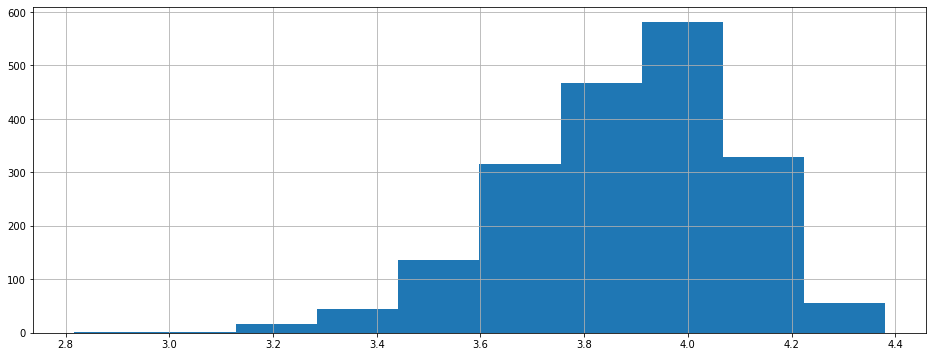

In [340]:
plt.figure(figsize=(16,6))
train["pctprivatecoveragealone"].hist();

Both variables seem to follow a normal distribution and are symetrical around the mean. Therefore we will look to replace those missing values with the mean.

In [316]:
# Deeper analysis.
train.describe()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,label_deathrate
count,2437.000000,2437.000000,2437.000000,2437.000000,2.437000e+03,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,...,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000
mean,596.767546,178.764054,448.175769,47117.872794,1.003379e+05,16.876898,157.080934,45.416742,39.490685,42.024497,...,41.290808,36.130488,19.182314,83.701255,8.881050,1.280309,2.007750,51.300348,5.662295,178.382314
std,1429.205941,503.818020,53.223898,12193.198993,3.372530e+05,6.413158,525.568854,46.839371,5.256361,5.324059,...,9.423292,7.845804,6.147876,16.263823,14.224030,2.727474,3.652719,6.504407,2.003879,27.899103
min,6.000000,3.000000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,...,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,59.700000
25%,76.000000,28.000000,420.800000,38848.000000,1.183000e+04,12.100000,0.000000,37.700000,36.300000,39.000000,...,34.600000,30.700000,14.700000,77.347704,0.615891,0.258771,0.296354,47.792409,4.520914,160.800000
50%,171.000000,60.000000,453.549422,45180.000000,2.658900e+04,15.800000,0.000000,40.900000,39.500000,42.300000,...,41.200000,36.300000,18.700000,90.075640,2.222103,0.548446,0.825917,51.726058,5.408652,177.800000
75%,518.000000,143.000000,480.800000,52448.000000,6.721500e+04,20.500000,82.482163,43.900000,42.500000,45.200000,...,47.700000,41.400000,23.100000,95.408451,10.191814,1.213394,2.119182,55.446216,6.536926,195.200000
max,38150.000000,14010.000000,1014.200000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,...,70.700000,65.100000,46.600000,100.000000,82.559131,42.619425,41.930251,71.703057,18.556701,293.900000


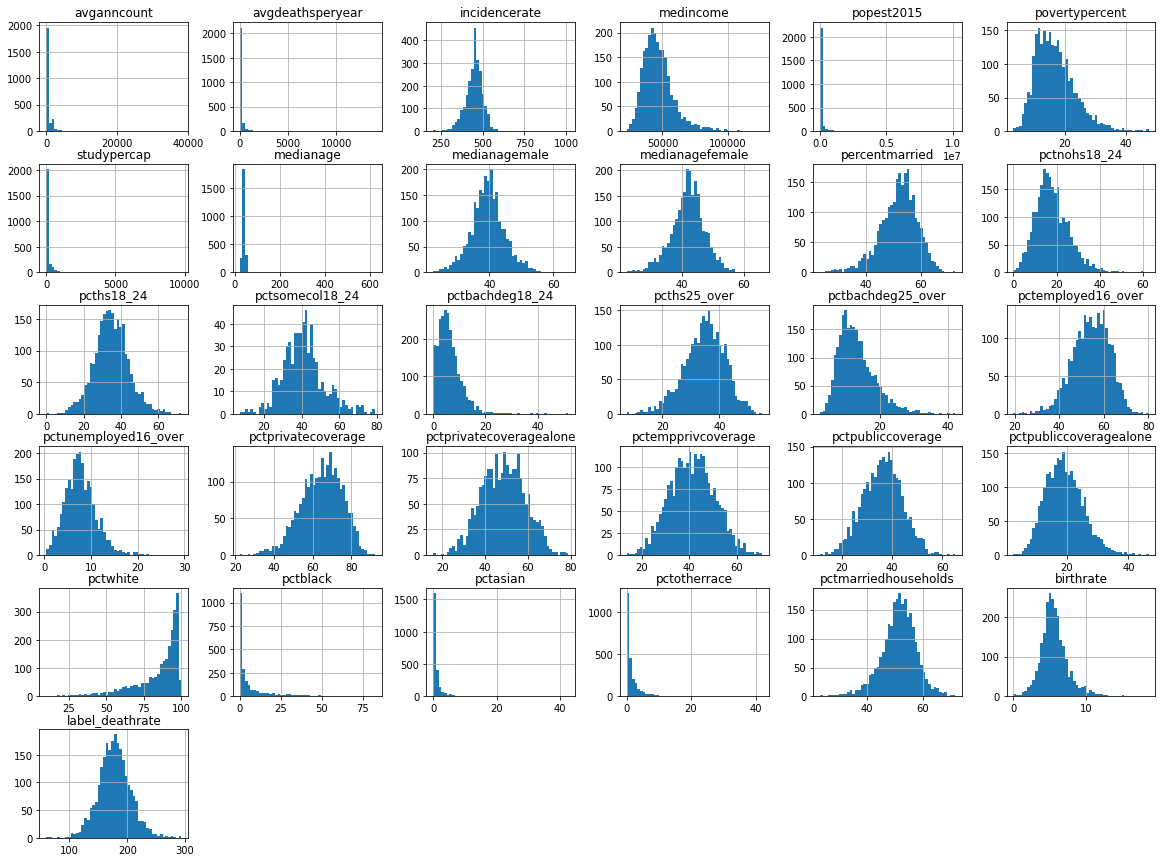

In [317]:
# Looking at how the data is distributed.
train.hist(bins=50, figsize=(20,15)) 
plt.show();

From the plot above and the statistics report, it can be seen the some of the data is skewed and needs to be transformed.

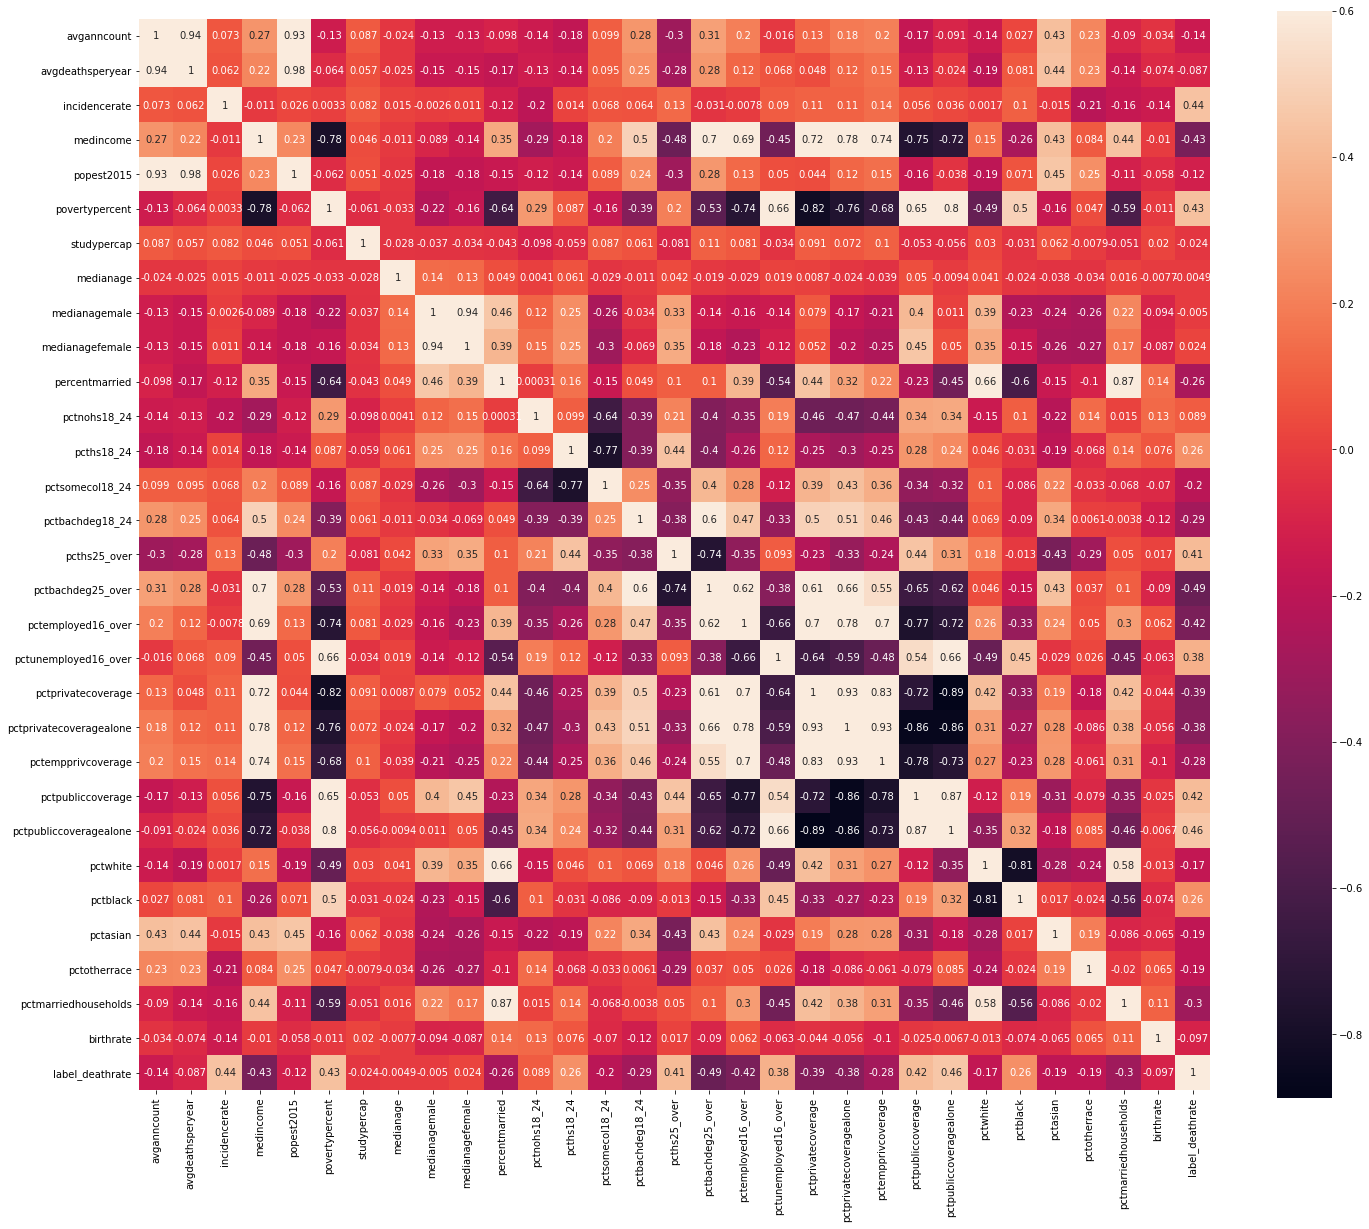

In [318]:
# How correlated are our variables? 
plt.figure(figsize=(24,20))
sns.heatmap(train.corr(), vmax=0.6, square=True, annot=True);

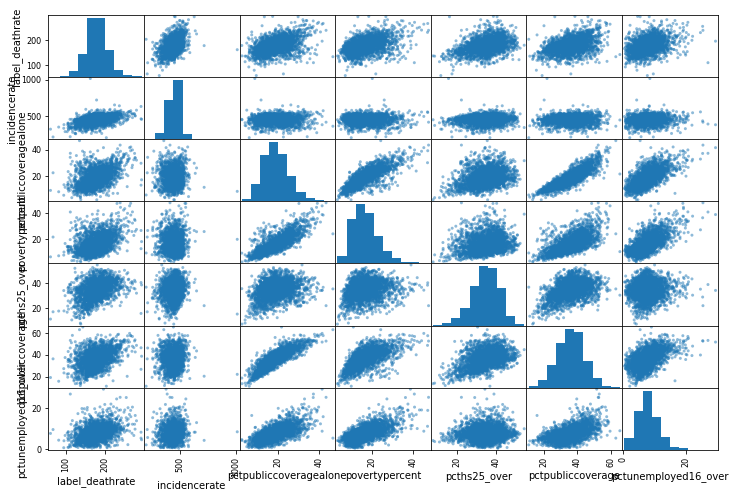

In [319]:
# Let's pick the most relevant ones and generate a scatter matrix.
attributes = ["label_deathrate", "incidencerate", "pctpubliccoveragealone", "povertypercent", "pcths25_over", 
              "pctpubliccoverage", "pctunemployed16_over"]
scatter_matrix(train[attributes], figsize=(12, 8));

There seems to be a linear relationship between the target variable and most of the features.

In [320]:
# Let's analyse our first categorical variable: geography. We shall divide it by state as opposed to by counties.
train['geography'] = train['geography'].str.rsplit(', ').str[-1] 
train['geography'].value_counts()

Texas             188
Georgia           126
Virginia          104
Kentucky           99
Missouri           91
Illinois           85
Kansas             84
Iowa               82
Tennessee          81
Minnesota          77
North Carolina     73
Ohio               71
Michigan           70
Oklahoma           64
Mississippi        63
Indiana            63
Nebraska           59
Arkansas           58
Wisconsin          55
Alabama            55
Colorado           51
Pennsylvania       50
Louisiana          49
New York           49
South Dakota       49
California         48
North Dakota       46
Florida            44
West Virginia      41
Montana            39
Idaho              35
South Carolina     35
Washington         29
Oregon             26
Utah               24
New Mexico         21
Wyoming            19
Alaska             17
Maryland           17
Maine              16
New Jersey         15
Nevada             12
Arizona            12
Vermont            10
Massachusetts      10
New Hampsh

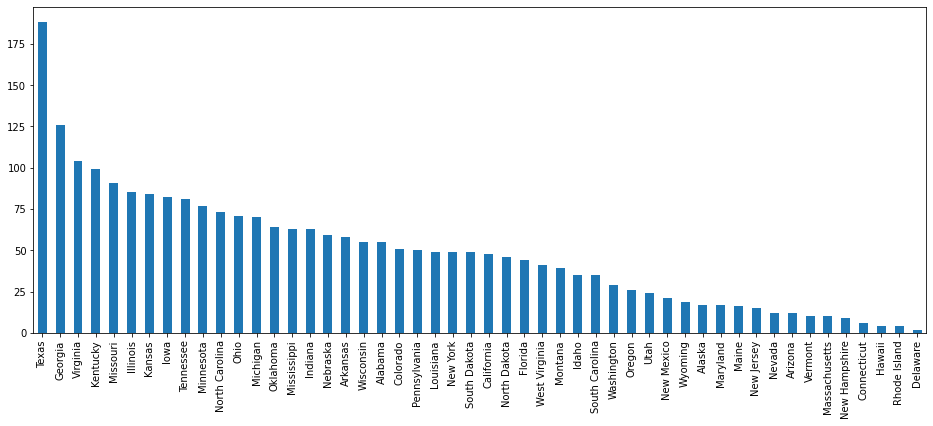

In [321]:
# Let's visualize those occurences per state.
plt.figure(figsize=(16,6))
train['geography'].value_counts().plot(kind='bar');

In a future version of this model, we could look to fetch more data from the states that don't contain as many occurrences. However, for the time being, we will remove the variable geography as the data is far too skeweed on observations per state. For instance, the state of Texas could have much higher cancer incidents and could make our model biased.

## **Step 3. Feature engineering**

In [322]:
# Here we look to finalize cleaning the data and transforming the variables.
def feature_eng(data):
    # features to drop
    drop_features = ['pctsomecol18_24','geography']
    
    # remaining categorical variable
    categorical_features = ['binnedinc']
    
    # filter columns to drop
    every_feature = [col for col in data.columns if col not in drop_features]
    data = data[every_feature]
    
    # get numerical features
    every_column_non_categorical = [col for col in data.columns if col not in categorical_features]
    numeric_feats = data[every_column_non_categorical].dtypes[data.dtypes != "object"].index
    
    # apply log transformation to numerical variables
    data[numeric_feats] = np.log1p(data[numeric_feats])
    
    # apply one-hot encoding, remove 1 column to keep the minimum of columns
    data = pd.get_dummies(data,columns =categorical_features, drop_first=True)

    # reformat data
    if 'label_deathrate' in data.columns:
        data['target'] = data['label_deathrate']
        data.drop(['label_deathrate'], axis=1, inplace=True)
    return data

In [323]:
train = feature_eng(train)
test = feature_eng(test)

In [324]:
train.head()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,...,"binnedinc_(37413.8, 40362.7]","binnedinc_(40362.7, 42724.4]","binnedinc_(42724.4, 45201]","binnedinc_(45201, 48021.6]","binnedinc_(48021.6, 51046.4]","binnedinc_(51046.4, 54545.6]","binnedinc_(54545.6, 61494.5]","binnedinc_(61494.5, 125635]","binnedinc_[22640, 34218.1]",target
2152,4.919981,4.077537,6.075576,10.310851,10.093488,3.288402,0.000000,3.754199,3.701302,3.795489,...,0,0,0,0,0,0,0,0,1,5.221976
2372,5.590987,4.691348,6.142252,10.629102,10.868987,3.173878,6.167517,3.535145,3.511545,3.558201,...,0,1,0,0,0,0,0,0,0,5.176715
1649,6.333280,5.442418,6.110358,10.856477,11.554307,2.451005,6.406001,3.747148,3.720862,3.772761,...,0,0,0,0,0,1,0,0,0,5.186268
528,4.532599,3.891820,5.984692,10.606709,9.781489,2.917771,0.000000,3.723281,3.693867,3.751854,...,0,1,0,0,0,0,0,0,0,5.311234
998,4.820282,4.007333,5.904544,10.819698,10.352842,3.015535,0.000000,3.637586,3.575151,3.811097,...,0,0,0,0,1,0,0,0,0,5.141079


## **Step 4. Fitting the model**

In [325]:
x_train, y_train = split_feat_label(train)
x_test, y_test = split_feat_label(test)

In [ ]:
x_train, y_train = split_feat_label(train)
x_test, y_test = split_feat_label(test)
col_mean = x_train.mean()
x_train = x_train.fillna(col_mean)
x_test = x_test.fillna(col_mean)
# Here we shall test our model by doing a 10-fold cross-validation.
folds = KFold(n_splits = 10, shuffle = True, random_state = seed)

# Number of features.
numfeatures = x_train.shape[1]

gridparameters = [{'n_features_to_select': list(range(2, numfeatures))}]

modelLR = LinearRegression()
rfeLR = RFE(modelLR)             

modelrfeCV = GridSearchCV(estimator = rfeLR, 
                        param_grid = gridparameters, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)     
# Fitting the model.
modelrfeCV.fit(x_train, y_train)

In [326]:
# Replacing missing values with their respective means.
col_mean = x_train.mean()
x_train = x_train.fillna(col_mean)
x_test = x_test.fillna(col_mean)

In [327]:
# Here we shall test our model by doing a 10-fold cross-validation.
folds = KFold(n_splits = 10, shuffle = True, random_state = seed)

# Number of features.
numfeatures = x_train.shape[1]

gridparameters = [{'n_features_to_select': list(range(2, numfeatures))}]

modelLR = LinearRegression()
rfeLR = RFE(modelLR)             

modelrfeCV = GridSearchCV(estimator = rfeLR, 
                        param_grid = gridparameters, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

In [328]:
# Fitting the model.
modelrfeCV.fit(x_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=1000, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [374]:
# What results are obtained by our cross-validation?
modelrfeCV_results = pd.DataFrame(modelrfeCV.cv_results_)

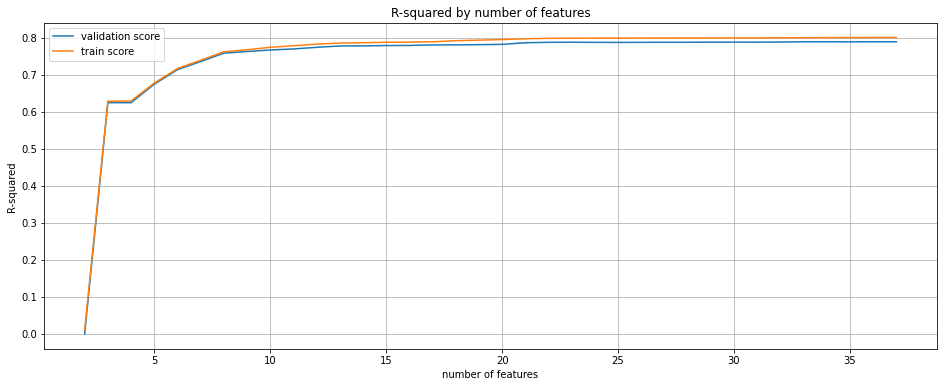

In [330]:
# Plotting those results.
plt.figure(figsize=(16,6))

plt.plot(modelrfeCV_results["param_n_features_to_select"], modelrfeCV_results["mean_test_score"])
plt.plot(modelrfeCV_results["param_n_features_to_select"], modelrfeCV_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('R-squared')
plt.title("R-squared by number of features")
plt.legend(['validation score', 'train score'])
plt.grid(True)
plt.show();

Looking at the graph, we can choose to keep 15 features in our final model as the slope seems to remain steady. We will choose a simpler model over one that contains more predictors as some noise could be generated behind the scenes.  

In [331]:
# Final model
best_numfeatures = 15 
LRfinal = LinearRegression()
LRfinal.fit(x_train, y_train)

rfeLRfinal = RFE(LRfinal, n_features_to_select=best_numfeatures)             
rfeLRfinal.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [332]:
list(zip(df.iloc[:, :-1].columns, rfeLRfinal.support_, rfeLRfinal.ranking_))

[('avganncount', False, 7),
 ('avgdeathsperyear', True, 1),
 ('incidencerate', True, 1),
 ('medincome', True, 1),
 ('popest2015', True, 1),
 ('povertypercent', False, 19),
 ('studypercap', False, 20),
 ('binnedinc', False, 14),
 ('medianage', True, 1),
 ('medianagemale', True, 1),
 ('medianagefemale', False, 6),
 ('geography', False, 12),
 ('percentmarried', True, 1),
 ('pctnohs18_24', False, 24),
 ('pcths18_24', False, 8),
 ('pctsomecol18_24', True, 1),
 ('pctbachdeg18_24', True, 1),
 ('pcths25_over', True, 1),
 ('pctbachdeg25_over', False, 4),
 ('pctemployed16_over', False, 15),
 ('pctunemployed16_over', False, 10),
 ('pctprivatecoverage', True, 1),
 ('pctprivatecoveragealone', True, 1),
 ('pctempprivcoverage', True, 1),
 ('pctpubliccoverage', False, 18),
 ('pctpubliccoveragealone', False, 9),
 ('pctwhite', False, 5),
 ('pctblack', True, 1),
 ('pctasian', False, 2),
 ('pctotherrace', False, 21),
 ('pctmarriedhouseholds', False, 23),
 ('birthrate', False, 16)]

In [333]:
# What is the R-squared obtained for the training set?
round(rfeLRfinal.score(x_train, y_train), 4)

0.7866

In [334]:
# Let's measure our test error.
scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error']
results_final = cross_validate(rfeLRfinal,
                        x_train,
                        y_train, 
                        scoring=scoring,
                        cv=folds,
                        return_train_score=True)


In [335]:
results_finaldf = pd.DataFrame(results_final)
results_finaldf

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error
0,0.108008,0.002992,0.775385,0.789122,-0.054536,-0.052957,-0.005690,-0.005373
1,0.072806,0.002991,0.781848,0.787100,-0.054298,-0.053217,-0.004983,-0.005483
2,0.064180,0.001994,0.756223,0.788350,-0.056085,-0.053358,-0.006768,-0.005336
3,0.063797,0.002992,0.810423,0.783904,-0.049730,-0.053707,-0.004688,-0.005522
4,0.066534,0.001994,0.777437,0.788587,-0.049308,-0.053552,-0.004978,-0.005458
5,0.064802,0.001995,0.784902,0.785258,-0.058266,-0.053002,-0.006297,-0.005368
6,0.066227,0.001992,0.792766,0.785578,-0.051371,-0.053665,-0.004689,-0.005528
7,0.063696,0.001995,0.823101,0.781528,-0.050841,-0.053797,-0.004654,-0.005535
8,0.068595,0.001994,0.808053,0.785047,-0.050996,-0.053447,-0.004555,-0.005506
9,0.064801,0.001994,0.674772,0.797678,-0.064331,-0.052306,-0.009145,-0.005090


In [336]:
# Calculating different metrics pertaining to the validity of our model during training: R2, MAE, MSE.
print("The following metrics were obtained for the training set: ")
print('   R-squared:', round(results_finaldf['train_r2'].mean(), 4))
print('   Standard deviation R-squared:', round(results_finaldf['train_r2'].std(), 4))
print('   Mean Absolute Error:', round(-1*results_finaldf['train_neg_mean_absolute_error'].mean(), 4))
print('   Mean Squared Error:', round(-1*results_finaldf['train_neg_mean_squared_error'].mean(), 4))

The following metrics were obtained for the training set: 
   R-squared: 0.7872
   Standard deviation R-squared: 0.0044
   Mean Absolute Error: 0.0533
   Mean Squared Error: 0.0054


In [393]:
# Calculating different metrics pertaining to the validity of our model during validation: R2, MAE, MSE.
print("The following metrics were obtained for the validation set: ")
print('   R-squared:', round(results_finaldf['test_r2'].mean(), 4))
print('   Standard deviation R-squared:', round(results_finaldf['test_r2'].std(), 4))
print('   Mean Absolute Error:', round(-1*results_finaldf['test_neg_mean_absolute_error'].mean(), 4))
print('   Mean Squared Error:', round(-1*results_finaldf['test_neg_mean_squared_error'].mean(), 4))

The following metrics were obtained for the validation set: 
   R-squared: 0.7785
   Standard deviation R-squared: 0.0414
   Mean Absolute Error: 0.054
   Mean Squared Error: 0.0056


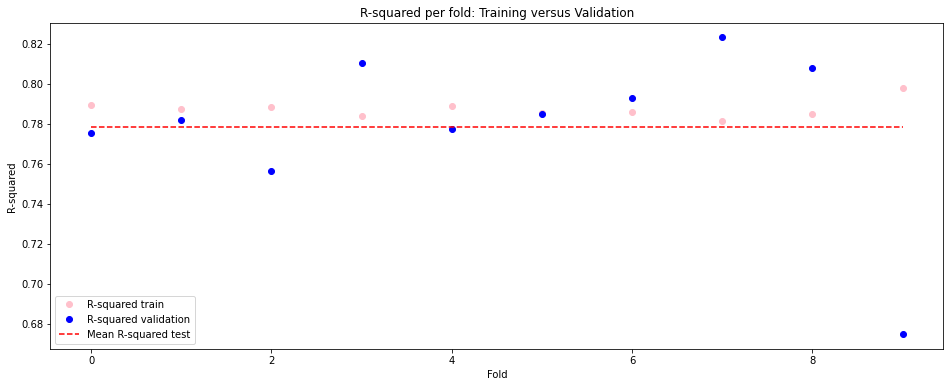

In [386]:
# Let's visualize once more our results for our R-squared.
r2_testavg = [np.mean(results_finaldf['test_r2'])]*len(results_finaldf)
plt.figure(figsize=(16, 6))
plt.plot(results_finaldf.index,results_finaldf['train_r2'], 'o', label='R-squared train', color='pink', )
plt.plot(results_finaldf.index,results_finaldf['test_r2'], 'o', label='R-squared validation', color='blue')
plt.plot(results_finaldf.index,r2_testavg, label='Mean R-squared test', linestyle='--', color='red')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('R-squared per fold: Training versus Validation')
plt.legend(loc='lower left')
plt.show;

## **Step 5. Final Model Score**

In [345]:
# Our model is finally ready to be tested.
y_pred = rfeLRfinal.predict(x_test)
round(rfeLRfinal.score(x_test, y_test), 4)

0.775

In [396]:
print("Our final model has achieved the following performance on the Test Data:")
print('   R-squared:', round(rfeLRfinal.score(x_test, y_test), 4))
print('   Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred), 4))
print('   Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred), 4))

Our final model has achieved the following performance on the Test Data:
   R-squared: 0.775
   Mean Absolute Error: 0.0537
   Mean Squared Error: 0.0051


## **Step 6. Model Card Functions: Fetch, Train, Evaluate, Build_Paper**

In [402]:
# Download/create the dataset
def fetch():
    url = "https://raw.githubusercontent.com/MarthyGarcia/IFT6390_Project1/main/Data/cancer_reg.csv"
    data = pd.read_csv(url)
    return data

In [403]:
# Train your model on the dataset
def train():
    df = fetch()
    df['label_deathrate'] = df['target_deathrate']
    df.drop(['target_deathrate'], axis=1, inplace=True)
    
    x = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Splitting the data: test, train 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, shuffle= True, random_state=seed)

    train = pd.concat([x_train, y_train], axis=1)
    test = pd.concat([x_test, y_test], axis=1)
    
    train = feature_eng(train)
    test = feature_eng(test)
    x_train, y_train = split_feat_label(train)
    x_test, y_test = split_feat_label(test)
    col_mean = x_train.mean()
    x_train = x_train.fillna(col_mean)
    x_test = x_test.fillna(col_mean)
    # Here we shall test our model by doing a 10-fold cross-validation.
    folds = KFold(n_splits = 10, shuffle = True, random_state = seed)

    # Number of features.
    numfeatures = x_train.shape[1]

    gridparameters = [{'n_features_to_select': list(range(2, numfeatures))}]

    modelLR = LinearRegression()
    rfeLR = RFE(modelLR)             

    modelrfeCV = GridSearchCV(estimator = rfeLR, 
                            param_grid = gridparameters, 
                            scoring= 'r2', 
                            cv = folds, 
                            verbose = 1,
                            return_train_score=True)     
    # Fitting the model.
    modelrfeCV.fit(x_train, y_train)
    
    best_numfeatures = 15 
    LRfinal = LinearRegression()
    LRfinal.fit(x_train, y_train)

    rfeLRfinal = RFE(LRfinal, n_features_to_select=best_numfeatures)
    rfeLRfinal.fit(x_train, y_train)
    model = rfeLRfinal
    
    return model, x_test, y_test

Fitting 10 folds for each of 36 candidates, totalling 360 fits


(RFE(estimator=LinearRegression(), n_features_to_select=15),
       avganncount  avgdeathsperyear  incidencerate  medincome  popest2015  \
 1762     7.811163          6.784457       6.193793  10.976303   13.001027   
 154      6.030685          5.105945       6.249203  10.944577   11.069462   
 1610     6.437752          5.560682       6.101663  10.660689   11.559876   
 1719     5.463832          4.543295       6.245719  10.757179   10.337637   
 2219     4.882802          4.043051       6.204962  10.736440    9.946212   
 ...           ...               ...            ...        ...         ...   
 14       7.725771          6.804615       6.090631  10.821457   13.104089   
 805      4.762174          3.970292       6.176699  10.368353    9.910612   
 2148     5.808142          4.983607       6.160363  10.363283   10.867749   
 2747     7.225481          6.390241       5.967172  10.695258   12.311585   
 70       4.962845          4.110874       6.119638  10.555500   10.116944   
 
 

In [406]:
# Compute the evaluation metrics and figures
def evaluate():
    print("Training the model and calculating the Test R-squared...")
    model, x_test, y_test = train()
    return round(model.score(x_test, y_test), 4)

In [410]:
# Compile the PDF documents
def build_paper():
    import urllib.request
    download_url = 'https://github.com/MarthyGarcia/IFT6390_Project1/raw/main/Pdf/card.pdf'
    filename = "card"
    response = urllib.request.urlopen(download_url)    
    file = open(filename + ".pdf", 'wb')
    file.write(response.read())
    file.close()
    download_url = 'https://github.com/MarthyGarcia/IFT6390_Project1/raw/main/Pdf/paper.pdf'
    filename = "paper"
    response = urllib.request.urlopen(download_url)    
    file = open(filename + ".pdf", 'wb')
    file.write(response.read())
    file.close()